<a href="https://colab.research.google.com/github/VPanadero2000/MLUCM2223/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preguntas:
1. debo comprobar si tengo datos duplicados?
2. no tengo que mirar nada de datos balanceados para regresión lineal así que de momento no lo hago no?

# **PRÁCTICA APRENDIZAJE SUPERVISADO**

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns    #visualización
import matplotlib.pyplot as plt   #visualización
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

## **0. DESCRIPCIÓN DE LAS VARIABLES:**
1. id - Unique ID for each home sold

2. date - Date of the home sale

3. price - Price of each home sold

4. bedrooms - Number of bedrooms

5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but 
no shower

6. sqft_living - Square footage of the apartments interior living space

7. sqft_lot - Square footage of the land space

8. floors - Number of floors

9. waterfront - A dummy variable for whether the apartment was overlooking the 
waterfront or not

10. view - An index from 0 to 4 of how good the view of the property was

11. condition - An index from 1 to 5 on the condition of the apartment,

12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

13. sqft_above - The square footage of the interior housing space that is above 
ground level

14. sqft_basement - The square footage of the interior housing space that is below ground level

15. yr_built - The year the house was initially built

16. yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in

17. zipcode

18. lat - Lattitude

19. long - Longitude

20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## **1. ANÁLISIS DESCRIPTIVO DE LOS DATOS**

In [2]:
#Leemos la base de datos con la que vamos a trabajar:
df = pd.read_csv("kc_house_data.csv")
df.head() 

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Como se puede ver en la celda previa, se puede ver que no hay ninguna entrada nula para ninguna de las variables. Concluimos que no hay datos missing.


Además, podemos ver también en la entrada enterior cuáles de las variables son enteras y cuáles son float. Sí hay que tener en cuenta que, aunque la única categórica que nos salga (object) sea date, algunas de las variables clasificadas que toman valores enteros, son categóricas. Este es el caso *waterfront, view, condition* y *grade*. 



Aparte de esto, tenemos una variable de identificación unica *id*, que toma también valores enteros.

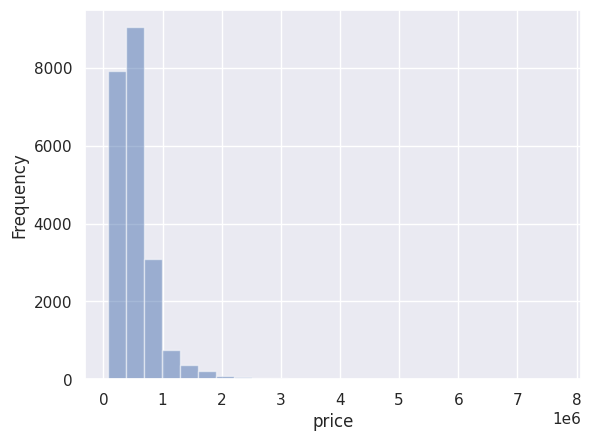

In [26]:
#Vemos la distribución de la variable precio, con un histograma 
df['price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('price')
plt.show()

Podemos ver que la mayoría de las casas se concentra en un conjunto de precios bajos y medios. Conforme el precio va aumentando, la frecuencia va disminuyendo de manera bastante intensa. Esto explicará una posible presencia de outliers en algunas variables (una minoría de casas carísimas, presentará valores elevadísimos en relación al resto de casas para algunas de las variables).

In [4]:
df_c = df.copy()
df_c.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

A continuación, quito la variable id, que sólo sirve para identificar las entradas y no lo voy a usar para nada. Tampoco serán relevantes para nuestro análisis la variable 'date', así como las variables relacionadas con la ubicación ('zipcode', 'lat', 'long').

In [5]:
df_c = df_c.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df_c.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

Lo primero que haremos será transformar las variables de superficie para pasarlas de pies al cuadrado a metros al cuadrado:

In [6]:
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
df_c[feetFeatures] = df_c[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048) 

df_c.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition','grade','sqm_above','sqm_basement','yr_built','yr_renovated',
                      'sqm_living15','sqm_lot15']

df_c.head(5)

price  bedrooms  bathrooms  sqm_living     sqm_lot  floors  waterfront  \
0  221900.0         3       1.00  109.625587  524.902176     1.0           0   
1  538000.0         3       2.25  238.760813  672.803816     2.0           0   
2  180000.0         2       1.00   71.535341  929.030400     1.0           0   
3  604000.0         4       3.00  182.089958  464.515200     1.0           0   
4  510000.0         3       2.00  156.077107  750.656563     1.0           0   

   view  condition  grade   sqm_above  sqm_basement  yr_built  yr_renovated  \
0     0          3      7  109.625587      0.000000      1955             0   
1     0          3      7  201.599597     37.161216      1951          1991   
2     0          3      6   71.535341      0.000000      1933             0   
3     0          5      7   97.548192     84.541766      1965             0   
4     0          3      8  156.077107      0.000000      1987             0   

   sqm_living15   sqm_lot15  
0    124.490074  524.902176  
1    157.006138  709.686323  
2    252.696269  748.984308  
3    126.348134  464.515200  
4    167.225472  697.051509

Ahora, me interesa transformar algunas variables categóricas de manera que tomen valores continuos. Otras, probablemente las elimine. 

Para hacer la transformación mencionada me conviene mirar los mínimos y máximos que toman esas variables para poder reescalarlas... Hago tabla de estadísticos descriptivos:

In [7]:
df_c.describe()

price      bedrooms     bathrooms    sqm_living        sqm_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000   21613.000000   
mean   5.400881e+05      3.370842      2.114757    193.229008    1403.483212   
std    3.671272e+05      0.930062      0.770163     85.325951    3848.091438   
min    7.500000e+04      0.000000      0.000000     26.941882      48.309581   
25%    3.219500e+05      3.000000      1.750000    132.572638     468.231322   
50%    4.500000e+05      3.000000      2.250000    177.444806     707.735359   
75%    6.450000e+05      4.000000      2.500000    236.902752     992.947692   
max    7.700000e+06     33.000000      8.000000   1257.907162  153416.271231   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

          sqm_above  sqm_basement      yr_built  yr_renovated  sqm_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean     166.146932     27.082077   1971.005136     84.402258    184.556766   
std       76.932169     41.116567     29.373411    401.679240     63.674936   
min       26.941882      0.000000   1900.000000      0.000000     37.068313   
25%      110.554618      0.000000   1951.000000      0.000000    138.425530   
50%      144.928742      0.000000   1975.000000      0.000000    170.941594   
75%      205.315718     52.025702   1997.000000      0.000000    219.251174   
max      874.217606    447.792653   2015.000000   2015.000000    576.927878   

          sqm_lot15  
count  21613.000000  
mean    1186.228346  
std     2536.641292  
min       60.479879  
25%      473.805504  
50%      707.921165  
75%      936.741352  
max    80937.128448

La variable waterfront es una variable binaria que nos indica si la casa dispone de vistas al mar o no. Por su parte, la variable view nos indica la calidad de las vistas de la vivienda. Asumiendo que las vistas al mar son equivalentes a las vistas de la montaña y se valoran igual en el mercado, quitamos *waterfront* y dejamos *view*.

La variable 'view' es un índice de valores enteros entre 0 y 4, con 0 indicando malas vistas y 4 indicando buenísimas vistas. A continuación reescalaremos esta variable para convertirla en una variable continua que tome valores entre 0 y 1, con 0 indicando pésimas vistas y 1 indicando buenísimas vistas

Lo mismo haremos con las variables 'condition' y 'grade', que indican la condición de la casa (a nivel de estado de la vivienda) y la "categoría", respectivamente:

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_c[['view_s', 'condition_s', 'grade_s']] = scaler.fit_transform(df_c[['view', 'condition', 'grade']])
df_c = df_c.drop(['view', 'condition', 'grade', 'waterfront'], axis=1)

In [9]:
df_c.head()

price  bedrooms  bathrooms  sqm_living     sqm_lot  floors   sqm_above  \
0  221900.0         3       1.00  109.625587  524.902176     1.0  109.625587   
1  538000.0         3       2.25  238.760813  672.803816     2.0  201.599597   
2  180000.0         2       1.00   71.535341  929.030400     1.0   71.535341   
3  604000.0         4       3.00  182.089958  464.515200     1.0   97.548192   
4  510000.0         3       2.00  156.077107  750.656563     1.0  156.077107   

   sqm_basement  yr_built  yr_renovated  sqm_living15   sqm_lot15  view_s  \
0      0.000000      1955             0    124.490074  524.902176     0.0   
1     37.161216      1951          1991    157.006138  709.686323     0.0   
2      0.000000      1933             0    252.696269  748.984308     0.0   
3     84.541766      1965             0    126.348134  464.515200     0.0   
4      0.000000      1987             0    167.225472  697.051509     0.0   

   condition_s   grade_s  
0          0.5  0.500000  
1          0.5  0.500000  
2          0.5  0.416667  
3          1.0  0.500000  
4          0.5  0.583333

A continuación, estudiamos la correlación primero entre las variables continuas. Para ello, haremos matrices de correlación/gráficos de dispersión:

In [10]:
df_cont = df_c.select_dtypes(include=['float64'])
df_cont.head()

price  bathrooms  sqm_living     sqm_lot  floors   sqm_above  \
0  221900.0       1.00  109.625587  524.902176     1.0  109.625587   
1  538000.0       2.25  238.760813  672.803816     2.0  201.599597   
2  180000.0       1.00   71.535341  929.030400     1.0   71.535341   
3  604000.0       3.00  182.089958  464.515200     1.0   97.548192   
4  510000.0       2.00  156.077107  750.656563     1.0  156.077107   

   sqm_basement  sqm_living15   sqm_lot15  view_s  condition_s   grade_s  
0      0.000000    124.490074  524.902176     0.0          0.5  0.500000  
1     37.161216    157.006138  709.686323     0.0          0.5  0.500000  
2      0.000000    252.696269  748.984308     0.0          0.5  0.416667  
3     84.541766    126.348134  464.515200     0.0          1.0  0.500000  
4      0.000000    167.225472  697.051509     0.0          0.5  0.583333

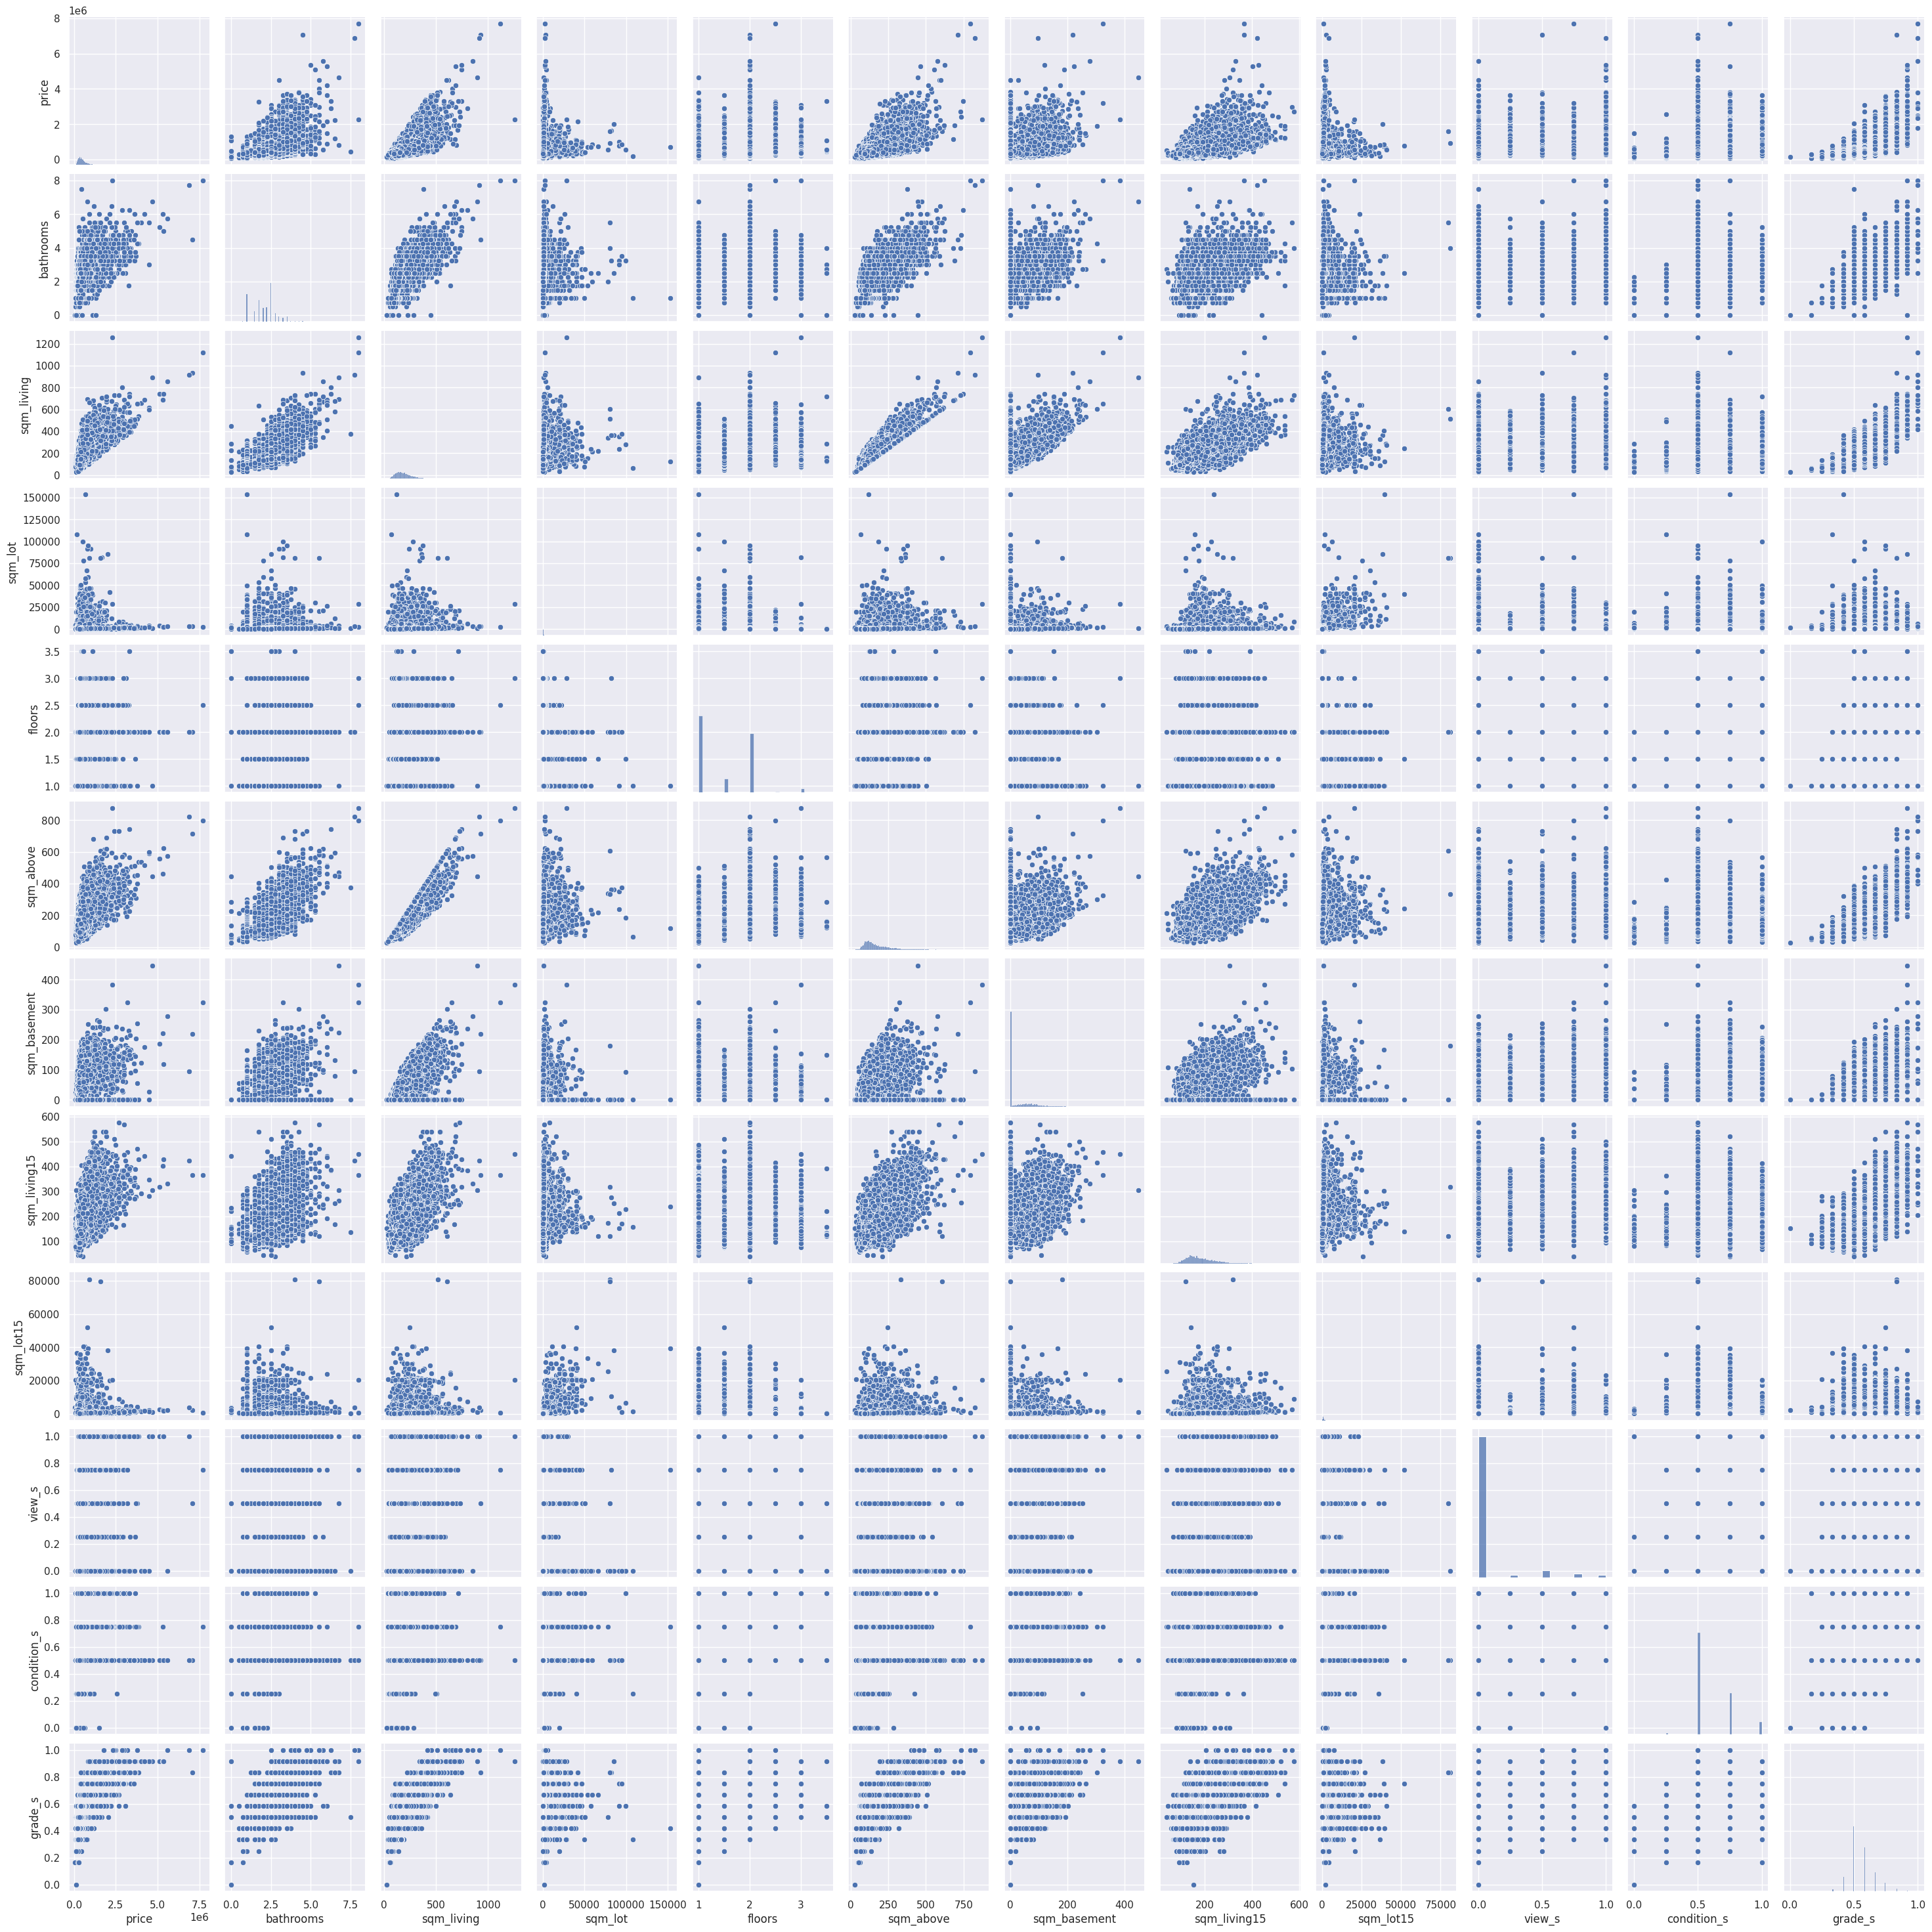

In [11]:
sns.pairplot(df_cont,vars = df_cont.columns)

<Axes: >

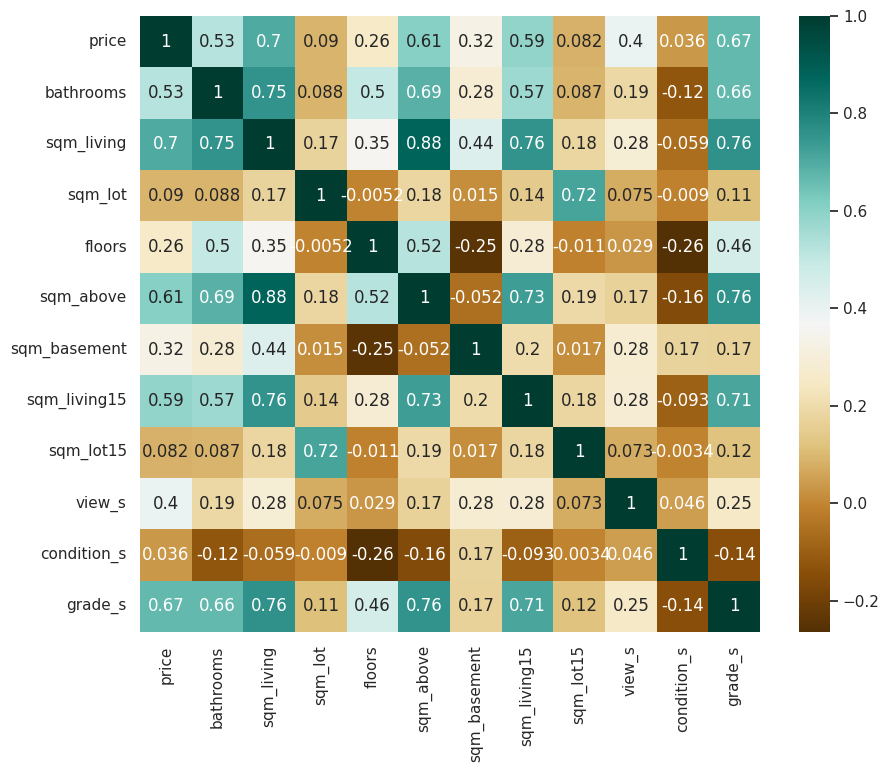

In [12]:
plt.figure(figsize=(10,8))
correlaciones= df_cont.corr() #de nuevo, para hacer las correlaciones, quitamos la variable "Clases"
sns.heatmap(correlaciones,cmap="BrBG",annot=True) #para mapa de calor

Ahora, hacemos la correlación con el total de las variables. Pudiera ser que variables como 'bedrooms' y 'bathrooms' tuviesen una alta correlación con variables como 'sqft_living'. De la misma manera, 'sqft_living' y 'sqft_lot' pueden estar correlacionadas con 'sqft_above' y 'sqft_basement'.

En el primero de los casos, pudiera ser interesante, por ejemplo, crear una variable que fuese habitaciones/superficie_habitable.... 

Lo vemos gráficamente:

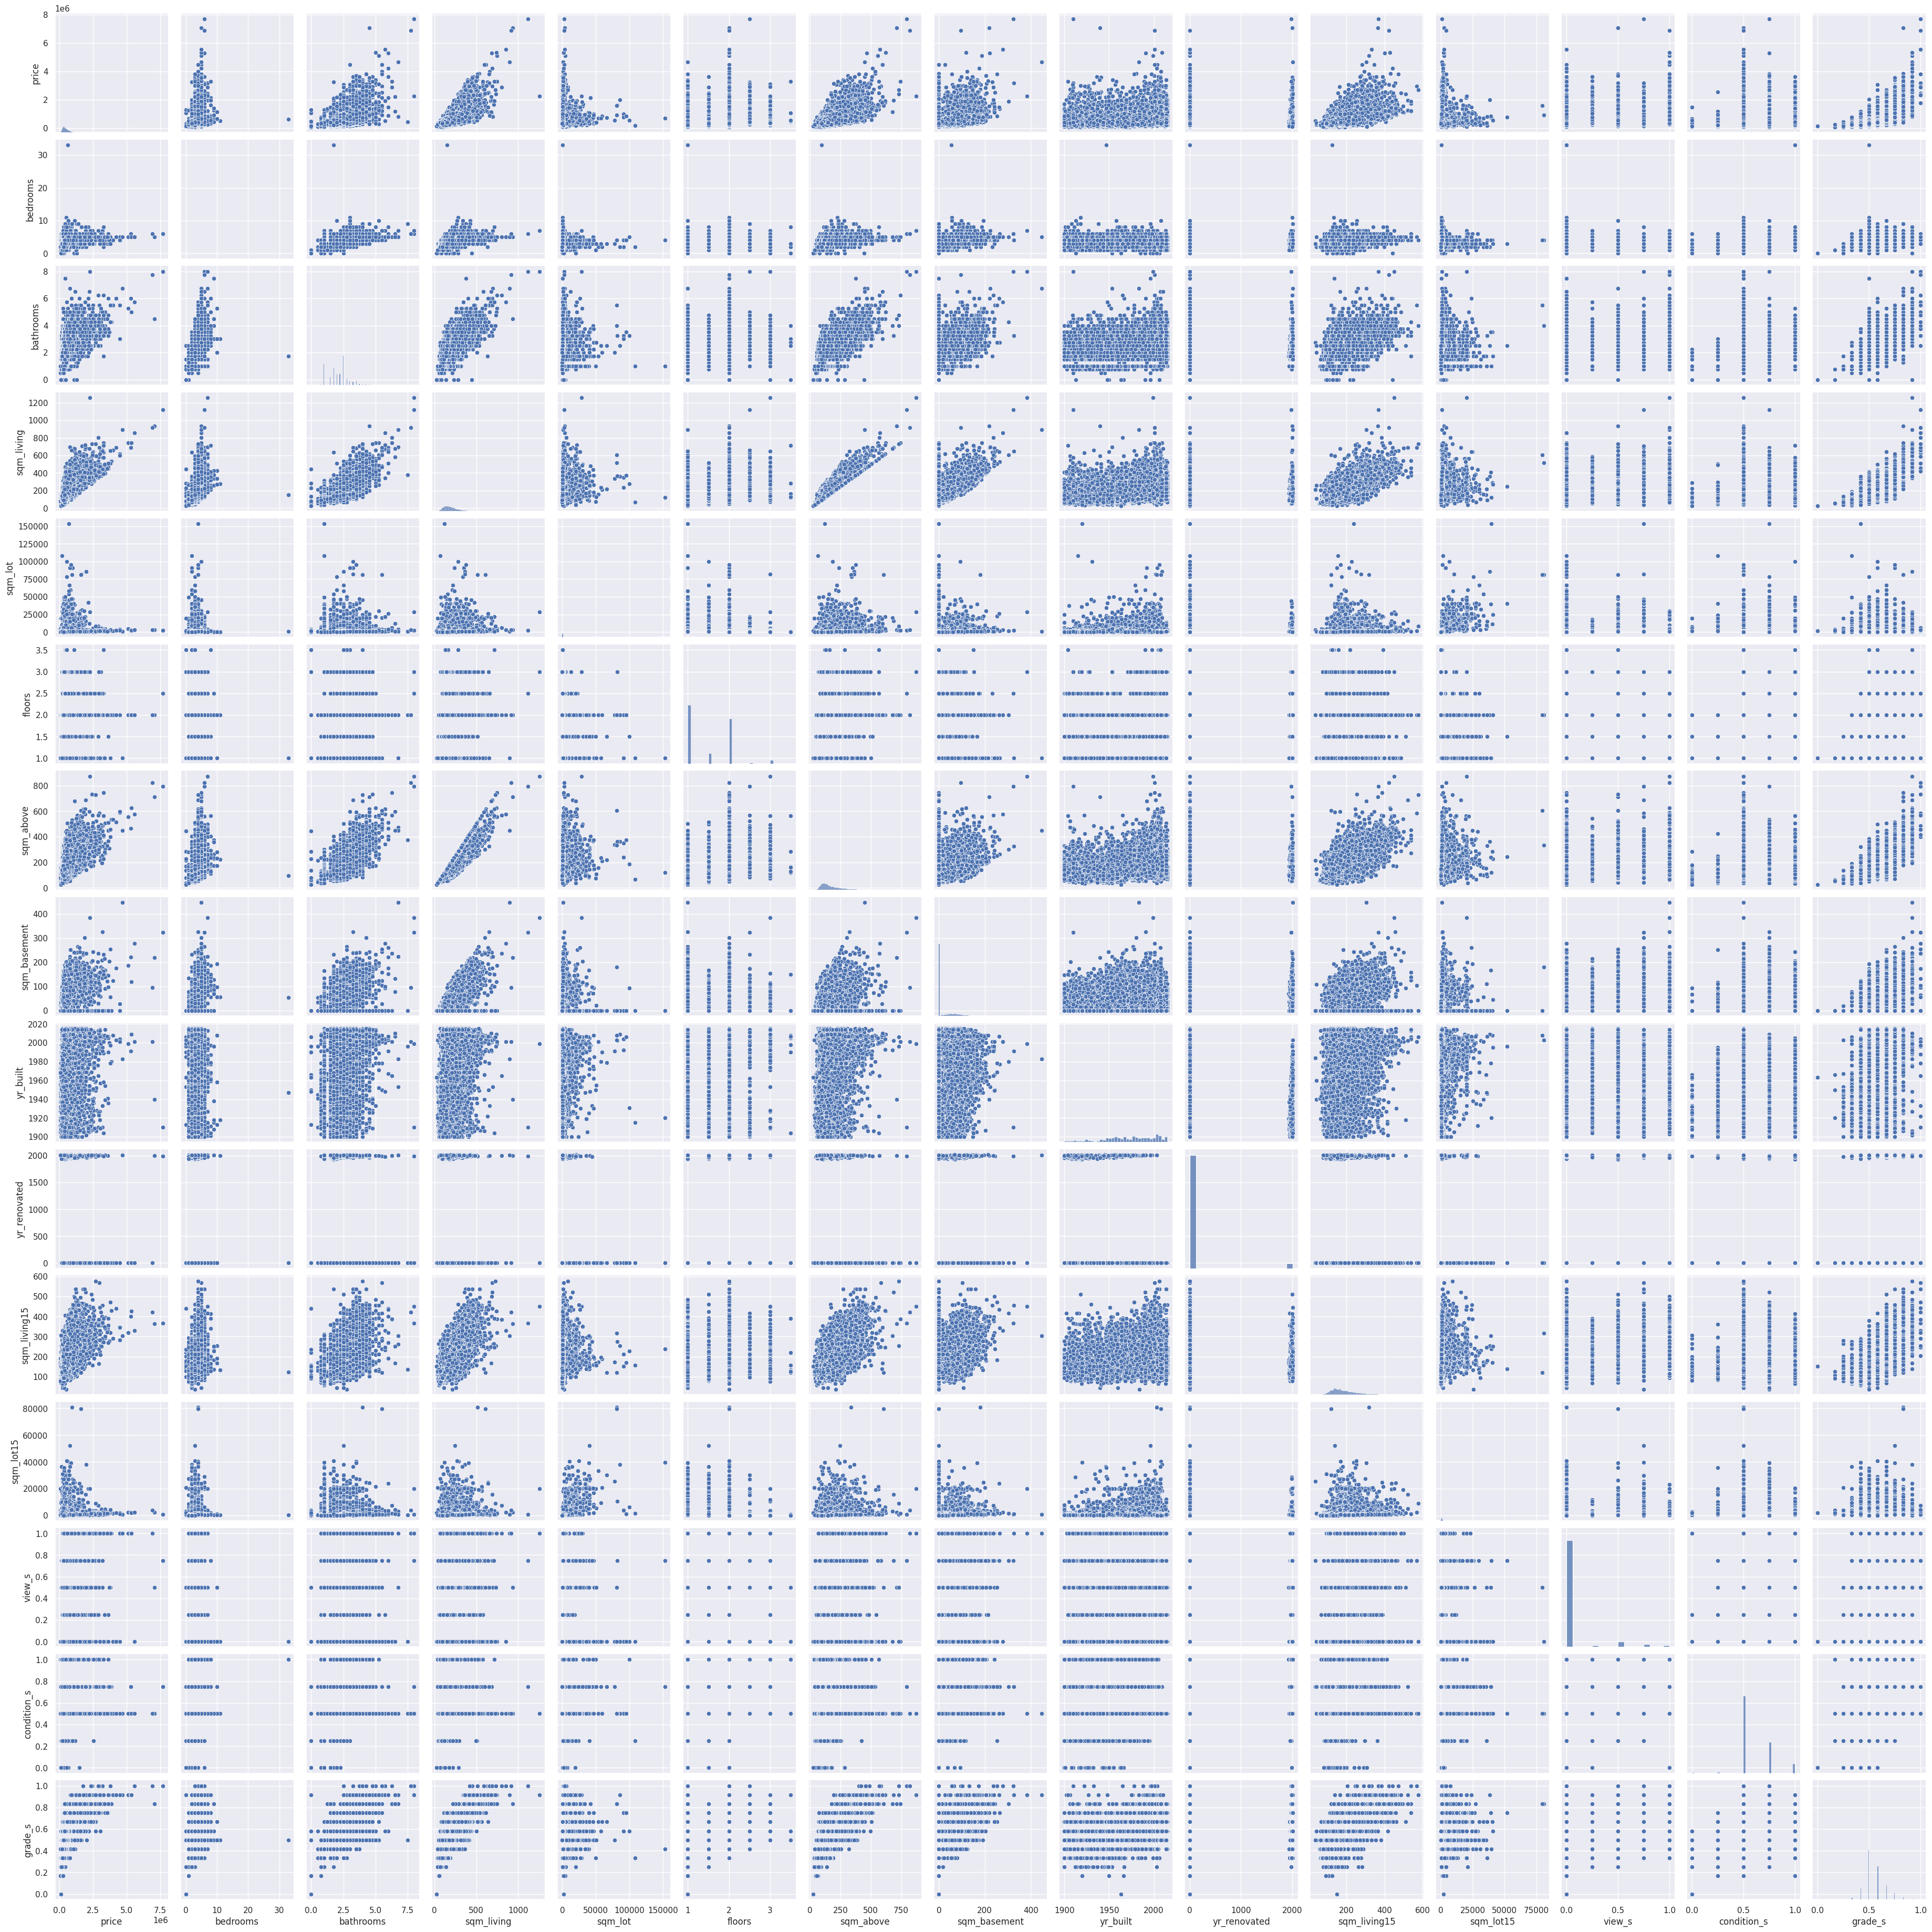

In [13]:
sns.pairplot(df_c,vars = df_c.columns)

Pues a priori, no parece que exista una correlación muy lineal entre bedrooms y sqft_living. Quizás, algo más con bathrooms, pero tampoco muy clara. 
Sin embargo, la relación entre sqft_living y sqft_above es prácticamente lineal.
Sacamos heatmap 

<Axes: >

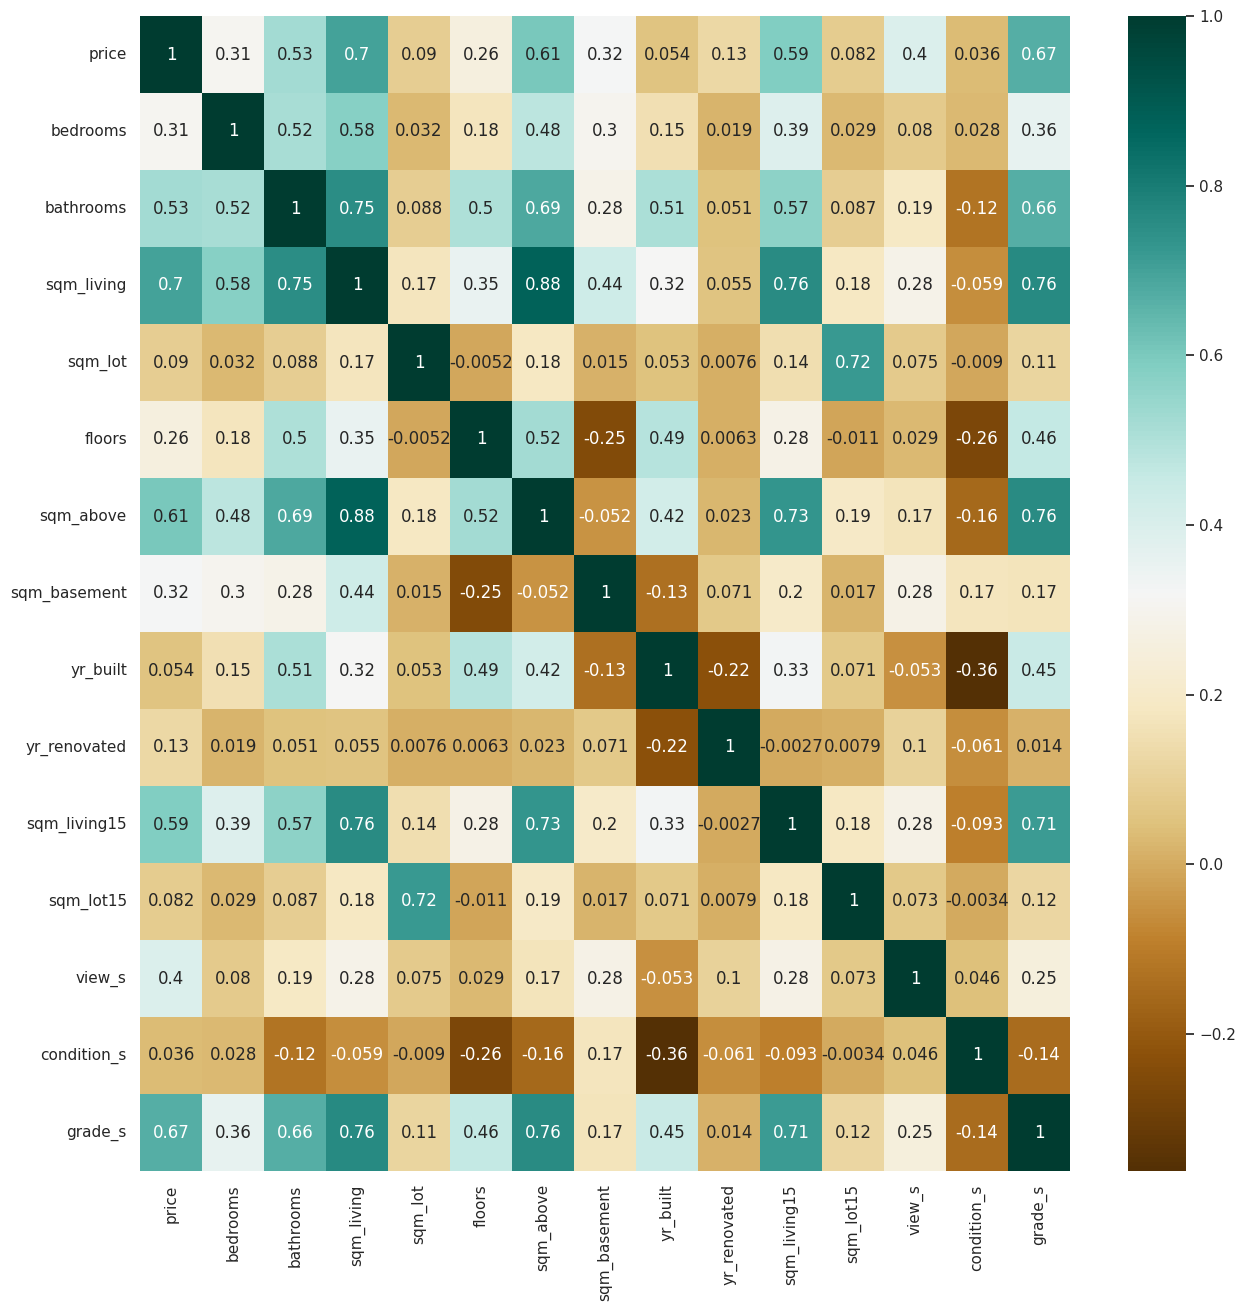

In [14]:
plt.figure(figsize=(15,15))
correlaciones= df_c.corr() #de nuevo, para hacer las correlaciones, quitamos la variable "Clases"
sns.heatmap(correlaciones,cmap="BrBG",annot=True) #para mapa de calor


Viendo el heatmap, creo que podemos decir que sí existe una correlación suficiente (entre *bedrooms* y *sqft_living* por un lado y entre *bathrooms* y *sqft_living* por otro). Creamos *bathrooms/sqft_living* por un lado y *bedrooms/sqft_living*, por otro:

Por otro lado, nos parece interesante hacer este mismo cociente entre 'sqft_living' y 'sqft_lot'. (Aunque puede ser que acabemos por optar no usar esta variable), así como sqft_above/sqft_living (ya que hemos comprobado que tanto sqft_above como sqft_basement son superficies habitables (ver datos)). También haremos el cociente de *bathrooms/bedrooms*.

In [16]:
df_c['bedrx_sqmli'] = df_c['bedrooms'] / df_c['sqm_living']
df_c['bathrx_sqmii'] = df_c['bathrooms'] / df_c['sqm_living']
df_c['sqmlix_sqmlot'] = df_c['sqm_living'] / df_c['sqm_lot']
df_c['sqmabx_sqmli'] = df_c['sqm_above'] / df_c['sqm_living']
df_c['bathx_bed'] = df_c['bathrooms'] / df_c['bedrooms']
df_c.head()

price  bedrooms  bathrooms  sqm_living     sqm_lot  floors   sqm_above  \
0  221900.0         3       1.00  109.625587  524.902176     1.0  109.625587   
1  538000.0         3       2.25  238.760813  672.803816     2.0  201.599597   
2  180000.0         2       1.00   71.535341  929.030400     1.0   71.535341   
3  604000.0         4       3.00  182.089958  464.515200     1.0   97.548192   
4  510000.0         3       2.00  156.077107  750.656563     1.0  156.077107   

   sqm_basement  yr_built  yr_renovated  sqm_living15   sqm_lot15  view_s  \
0      0.000000      1955             0    124.490074  524.902176     0.0   
1     37.161216      1951          1991    157.006138  709.686323     0.0   
2      0.000000      1933             0    252.696269  748.984308     0.0   
3     84.541766      1965             0    126.348134  464.515200     0.0   
4      0.000000      1987             0    167.225472  697.051509     0.0   

   condition_s   grade_s  bedrx_sqmli  bathrx_sqmii  sqmlix_sqmlot  \
0          0.5  0.500000     0.027366      0.009122       0.208850   
1          0.5  0.500000     0.012565      0.009424       0.354874   
2          0.5  0.416667     0.027958      0.013979       0.077000   
3          1.0  0.500000     0.021967      0.016475       0.392000   
4          0.5  0.583333     0.019221      0.012814       0.207921   

   sqmabx_sqmli  bathx_bed  
0      1.000000   0.333333  
1      0.844358   0.750000  
2      1.000000   0.500000  
3      0.535714   0.750000  
4      1.000000   0.666667

## **1.1 Tratamiento de outliers**

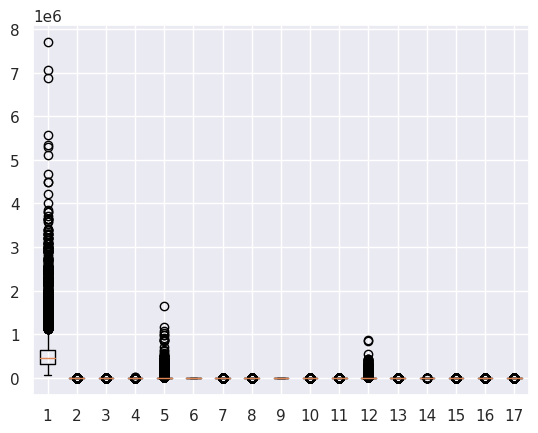

In [ ]:
#a falta de ver qué más cosas hago con algunas variables (las relacionadas con superficie sobre todo, voy al tratamiento de 
#atípicos:
#En primer lugar, hacemos análisis gráfico boxplot:
data = [df_c['price'], df_c['bedrooms'], df_c['bathrooms'], df_c['sqft_living'], df_c['sqft_lot'], df_c['floors'],
        df_c['sqft_above'], df_c['sqft_basement'], df_c['yr_built'], df_c['yr_renovated'], df_c['sqft_living15'], 
        df_c['sqft_lot15'], df_c['view_s'], df_c['condition_s'], df_c['grade_s'], df_c['bedrx_sqfti'], 
        df_c['bathrx_sqftli']]
plt.boxplot(data)
plt.show()

Parece que hay presencia de atípicos en todas laas variables. Los puedo identificar como se ha hecho abajo, o con mahalanobi, pero no sé si imputar datos o eliminar... PFFFF

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_price = df['price'][(df['price'] < lower_limit) | (df['price'] > upper_limit)]
outliers_price

5        1225000.0
21       2000000.0
49       1350000.0
69       1325000.0
125      1450000.0
           ...    
21568    1700000.0
21576    3567000.0
21590    1222500.0
21597    1575000.0
21600    1537000.0
Name: price, Length: 1146, dtype: float64

In [ ]:
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_sqft_lot = df['sqft_lot'][(df['sqft_lot'] < lower_limit) | (df['sqft_lot'] > upper_limit)]
outliers_sqft_lot

5        101930
12        19901
21        44867
36        34848
41        24186
          ...  
21494     62726
21506    130017
21520     50621
21525    108865
21548    184231
Name: sqft_lot, Length: 2425, dtype: int64

In [ ]:
Q1 = df['sqft_lot15'].quantile(0.25)
Q3 = df['sqft_lot15'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_sqft_lot15 = df['sqft_lot15'][(df['sqft_lot15'] < lower_limit) | (df['sqft_lot15'] > upper_limit)]
outliers_sqft_lot15

5        101930
21        20336
41        30617
49        72513
60        18900
          ...  
21520     74052
21525    107498
21532     50447
21548    151081
21576     18270
Name: sqft_lot15, Length: 2194, dtype: int64

In [ ]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers_sqft_lot15 = df['sqft_living'][(df['sqft_living'] < lower_limit) | (df['sqft_living'] > upper_limit)]
outliers_sqft_lot15

5        5420
70       4770
115      4380
153      5180
239      4410
         ... 
21551    4350
21561    4500
21576    4850
21590    4910
21600    4470
Name: sqft_living, Length: 572, dtype: int64

(SUPUESTO QUE HEMOS TRATADO LOS OUTLIERS. NO LOS VAMOS A TRATAR CREO YO)
## **2. ELECCIÓN DE VARIABLES**

Vamos a querer predecir el precio haciendo uso de algunas de las variables. Para elegir las variables que queremos utilizar, vamos a tratar de darles orden de importancia bajo criterios de correlación. Además, si alguna variable nos parece interesante, pues también la incluimos:

In [17]:
matriz_corr = df_c.corr()
matriz_corr

price  bedrooms  bathrooms  sqm_living   sqm_lot    floors  \
price          1.000000  0.308350   0.525138    0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884    0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000    0.754665  0.087740  0.500653   
sqm_living     0.702035  0.576671   0.754665    1.000000  0.172826  0.353949   
sqm_lot        0.089661  0.031703   0.087740    0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653    0.353949 -0.005201  1.000000   
sqm_above      0.605567  0.477600   0.685342    0.876597  0.183512  0.523885   
sqm_basement   0.323816  0.303093   0.283770    0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019    0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739    0.055363  0.007644  0.006338   
sqm_living15   0.585379  0.391638   0.568634    0.756420  0.144608  0.279885   
sqm_lot15      0.082447  0.029244   0.087175    0.183286  0.718557 -0.011269   
view_s         0.397293  0.079532   0.187737    0.284611  0.074710  0.029444   
condition_s    0.036362  0.028472  -0.124982   -0.058753 -0.008958 -0.263768   
grade_s        0.667434  0.356967   0.664983    0.762704  0.113621  0.458183   
bedrx_sqmli   -0.468367  0.062749  -0.517869   -0.678042 -0.137271 -0.312995   
bathrx_sqmii  -0.267903 -0.233817   0.194445   -0.435384 -0.117548  0.166354   
sqmlix_sqmlot  0.123115  0.026637   0.286338    0.077223 -0.252697  0.557030   
sqmabx_sqmli  -0.135539 -0.196172  -0.128827   -0.207346  0.029353  0.345513   
bathx_bed      0.281333 -0.234795   0.653066    0.311094  0.063110  0.421261   

               sqm_above  sqm_basement  yr_built  yr_renovated  sqm_living15  \
price           0.605567      0.323816  0.054012      0.126434      0.585379   
bedrooms        0.477600      0.303093  0.154178      0.018841      0.391638   
bathrooms       0.685342      0.283770  0.506019      0.050739      0.568634   
sqm_living      0.876597      0.435043  0.318049      0.055363      0.756420   
sqm_lot         0.183512      0.015286  0.053080      0.007644      0.144608   
floors          0.523885     -0.245705  0.489319      0.006338      0.279885   
sqm_above       1.000000     -0.051943  0.423898      0.023285      0.731870   
sqm_basement   -0.051943      1.000000 -0.133124      0.071323      0.200355   
yr_built        0.423898     -0.133124  1.000000     -0.224874      0.326229   
yr_renovated    0.023285      0.071323 -0.224874      1.000000     -0.002673   
sqm_living15    0.731870      0.200355  0.326229     -0.002673      1.000000   
sqm_lot15       0.194050      0.017276  0.070958      0.007854      0.183192   
view_s          0.167649      0.276947 -0.053440      0.103917      0.280439   
condition_s    -0.158214      0.174105 -0.361417     -0.060618     -0.092824   
grade_s         0.755923      0.168392  0.446963      0.014414      0.713202   
bedrx_sqmli    -0.601928     -0.280835 -0.295111     -0.049962     -0.566589   
bathrx_sqmii   -0.353762     -0.241604  0.213799     -0.019620     -0.343890   
sqmlix_sqmlot   0.051908      0.063132  0.279186     -0.003397     -0.042132   
sqmabx_sqmli    0.257840     -0.912726  0.197935     -0.047713     -0.036573   
bathx_bed       0.310324      0.064963  0.427535      0.041786      0.264102   

               sqm_lot15    view_s  condition_s   grade_s  bedrx_sqmli  \
price           0.082447  0.397293     0.036362  0.667434    -0.468367   
bedrooms        0.029244  0.079532     0.028472  0.356967     0.062749   
bathrooms       0.087175  0.187737    -0.124982  0.664983    -0.517869   
sqm_living      0.183286  0.284611    -0.058753  0.762704    -0.678042   
sqm_lot         0.718557  0.074710    -0.008958  0.113621    -0.137271   
floors         -0.011269  0.029444    -0.263768  0.458183    -0.312995   
sqm_above       0.194050  0.167649    -0.158214  0.755923    -0.601928   
sqm_basement    0.017276  0.276947     0.174105  0.168392    -0.

Ordenamos las correlaciones de la variable price con el resto de variables para identificar mejor las variables más correlacionadas con la misma:

In [18]:
matriz_corr["price"].sort_values(ascending=False)

price            1.000000
sqm_living       0.702035
grade_s          0.667434
sqm_above        0.605567
sqm_living15     0.585379
bathrooms        0.525138
view_s           0.397293
sqm_basement     0.323816
bedrooms         0.308350
bathx_bed        0.281333
floors           0.256794
yr_renovated     0.126434
sqmlix_sqmlot    0.123115
sqm_lot          0.089661
sqm_lot15        0.082447
yr_built         0.054012
condition_s      0.036362
sqmabx_sqmli    -0.135539
bathrx_sqmii    -0.267903
bedrx_sqmli     -0.468367
Name: price, dtype: float64

Parece que serán importantes variables como:
'sqm_living', 'grade_s', 'sqm_above', 'sqm_living15', 'bathrooms', 'view_s'... hasta 'floor' quizás. 

No obstante, sqm_above y sqm_living están muy correlacionadas (0.876), por lo que igual no conviene incluirlas a las dos. Como, por otro lado, no queremos olvidarnos de la importancia de la proporción de superficie habitable por encima del nivel del suelo, probablemente utilizarremos la variable cociente sqmabx_sqmli (aunque nos chirría esa correlación negativa...)

Además, también creemos que puede ser interesante incluir las variables cocientes bedrx_sqmli (aunque, de nuevo, nos vuelve a chirriar esa correlación negativa...), bathx_bed, y sqmlix_sqmlot (esta última para no olvidarnos de sqm_lot, que por sí sóla no parece ser súper importante, pero que gana algo de importancia si la tenemos encuenta de esta manera)


Con esto, el dataframe definitivo que usaremos, será el siguiente:

In [23]:
df_def = df_c.loc[:, ['price', 'sqm_living',  'sqmabx_sqmli', 'sqmlix_sqmlot','bathrooms', 'bedrooms', 'bathx_bed',
                      'view_s', 'grade_s','condition_s']]
df_def.head()

price  sqm_living  sqmabx_sqmli  sqmlix_sqmlot  bathrooms  bedrooms  \
0  221900.0  109.625587      1.000000       0.208850       1.00         3   
1  538000.0  238.760813      0.844358       0.354874       2.25         3   
2  180000.0   71.535341      1.000000       0.077000       1.00         2   
3  604000.0  182.089958      0.535714       0.392000       3.00         4   
4  510000.0  156.077107      1.000000       0.207921       2.00         3   

   bathx_bed  view_s   grade_s  condition_s  
0   0.333333     0.0  0.500000          0.5  
1   0.750000     0.0  0.500000          0.5  
2   0.500000     0.0  0.416667          0.5  
3   0.750000     0.0  0.500000          1.0  
4   0.666667     0.0  0.583333          0.5

## **4. SPLIT DE DATOS Y ESTANDARIZACIÓN DE VARIABLES CONTINUAS**

In [29]:
X = df_def.iloc[:, [1,2,3,4,5,6,7,8,9]].values
y = df_def['price'].values

In [52]:
X[:,4]

array([3., 3., 2., ..., 2., 3., 2.])

In [53]:
X_cont = X[:, [0, 1, 2, 3, 5, 6, 7, 8]] 

means = X_cont.mean(axis=0)
stds = X_cont.std(axis=0)

X_cont_scaled = (X_cont - means) / stds
X_scaled = np.concatenate([X_cont_scaled, X[:, 4]], axis=1) # Concatenamos con las variables discretas

ValueError: ignored

In [33]:
#spliteamos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#
#X_train_cont = X_train[:, [0, 1, 2, 3, 5, 6, 7, 8]]
#X_train_disc = X_train[:, [4]]
#
#scaler = StandardScaler()
#
#y_train_scaled = scaler.fit_transform(y_train)